BUILD A MODEL TO PREDICT PERFORMANCE OF EMPLOYEES,BASED ON THE VISUALISATION AND ANALYSIS OF PAST DATA OF EMPLOYEES PERFORMANCE.

Importing Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

Read and Understand the data

In [4]:
Data = pd.read_csv("Test_data.csv")
Data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
Data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [6]:
Data.shape

(23490, 13)

In [7]:
Data.size

305370

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [9]:
Data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [10]:
Data.duplicated().sum()

0

In [11]:
Data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

we have null values in two columns:

1.education = 1034
2. previous_year_rating = 1812

 1. education (Categorical, 1034 missing)

In [12]:
def treat_null_in_education(df, col_name):
    df[col_name] = df[col_name].fillna('Others')

treat_null_in_education(Data, 'education')

2.previous_year_rating(Numerical, 1812 missing)

In [13]:
Data = Data.dropna(subset=['previous_year_rating'])

VISUALISATION 

Count plots for categorical features

1. Department-wise Employee Count

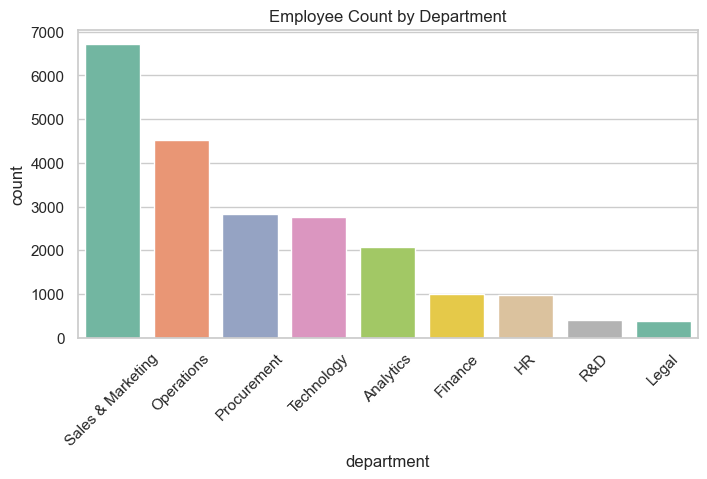

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data= Data, x='department', order=Data['department'].value_counts().index, palette="Set2")
plt.xticks(rotation=45)
plt.title("Employee Count by Department")
plt.show()

2. Region-wise Employee Distribution

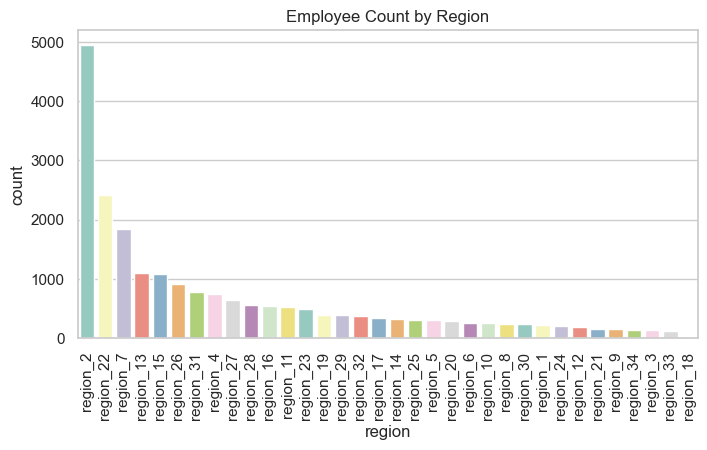

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data=Data, x='region',order=Data['region'].value_counts().index, palette="Set3")
plt.xticks(rotation=90)
plt.title("Employee Count by Region")
plt.show()

3. Education Level Distribution

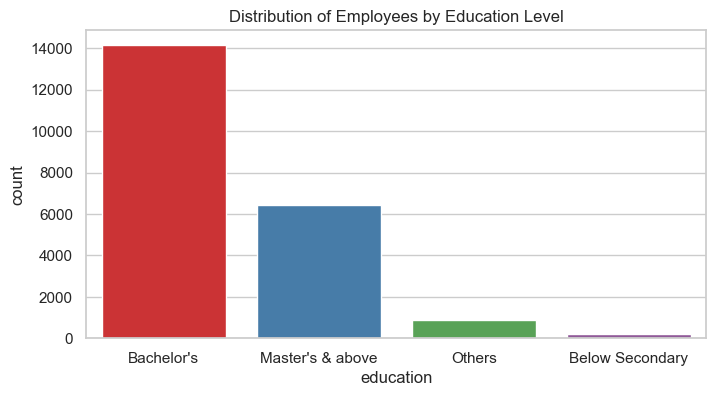

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(data=Data, x='education', palette="Set1")
plt.title("Distribution of Employees by Education Level")
plt.show()

4. Gender Distribution

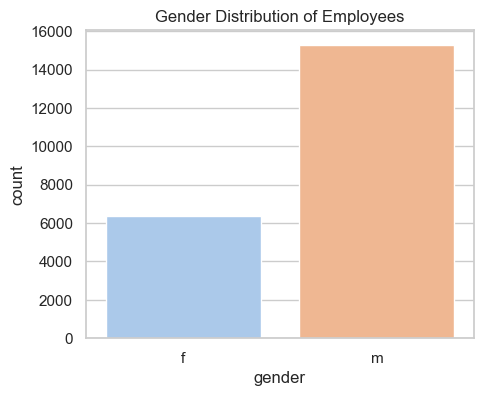

In [17]:
plt.figure(figsize=(5, 4))
sns.countplot(data= Data, x='gender', palette="pastel")
plt.title("Gender Distribution of Employees")
plt.show()

5. Recruitment Channel Distribution

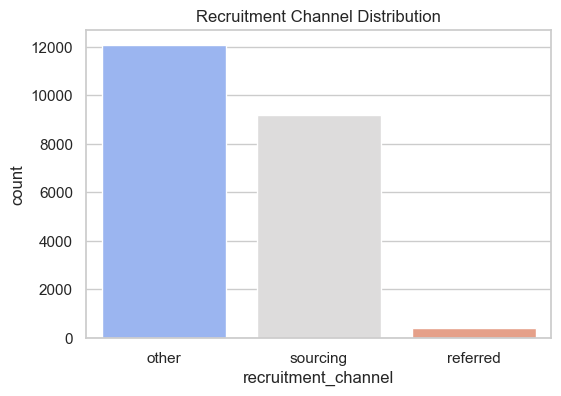

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=Data, x='recruitment_channel', palette="coolwarm")
plt.title("Recruitment Channel Distribution")
plt.show()

6. Previous Year Rating

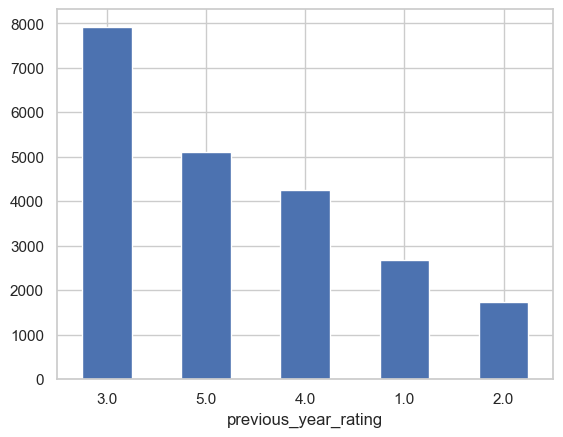

In [19]:
rating_value_counts = Data['previous_year_rating'].value_counts()
rating_value_counts.plot(kind='bar', rot=0)
plt.show()

7. Employees with KPI Met > 80%

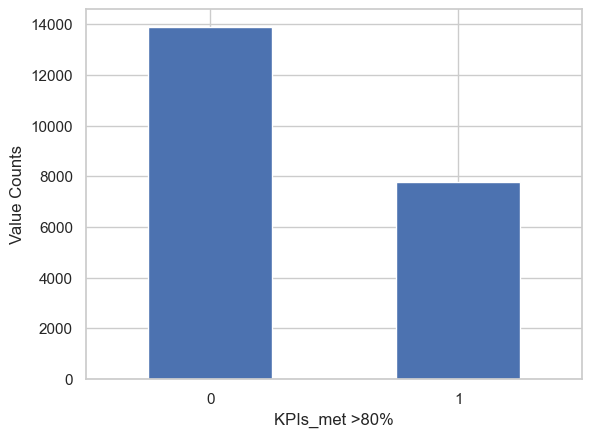

In [20]:
kpi_value_counts = Data['KPIs_met >80%'].value_counts()
kpi_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

8. Awards Won

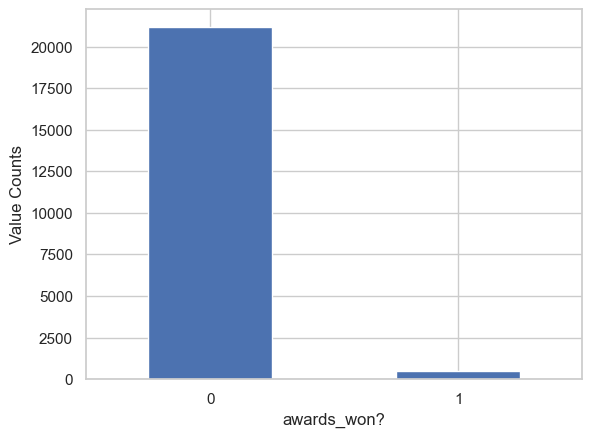

In [21]:
awards_value_counts = Data['awards_won?'].value_counts()
awards_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

Key insights from count plots

DEPARTMENT

 1.' Sales & Marketing' has the highest count, indicating that it is the largest department in terms of employee numbers in this dataset.
 2. The 'Operations' department follows as the second largest.
 3. 'Procurement' and 'Technology' have similar counts, suggesting they are smaller but comparably sized departments within the organization.
 4. 'Analytics', 'Finance', 'HR', 'R&D', and 'Legal' have progressively fewer employees, with 'Legal' being the smallest department.
 5. The visualization of 'Sales & Marketing' and 'Operations' suggests that these are likely core functions of the business, requiring the most    personnel.
 6. The smaller size of specialized departments like 'R&D' and 'Legal' is typical for many organizations, as these functions may not require as many staff as the more central operational roles.
 7. Departments such as 'Analytics' and 'Finance' may be support functions that require a moderate number of employees to function effectively across the organization.

REGION-WISE

1. The 'region_2' has the highest count of employees, suggesting that this region has the largest employee base within the organization.
2. The counts for other regions vary, with 'region_22', 'region_7', and 'region_15' having more employees than the rest but still significantly fewer than 'region_2'.
3. The remaining regions have progressively fewer employees, with some regions having very few employees in comparison to 'region_2'.
4. The organization may need to focus more HR resources and development programs in 'region_2', given its larger workforce.
5. The regions with fewer employees might be areas of potential expansion or may require different management strategies due to their smaller size.

EDUCATION

 1.Majority Employees have a Bachelor's Degree.
 2.Few have Master's & very few have Secondary education.

GENDER DISTRIBUTION

 1. There are significantly more male employees ('m') than female employees ('f') in this dataset.
 2. The count of male employees exceeds 14000, while the count of female employees is just over 8000.
 3. There is a notable gender imbalance in the workforce represented in TFI. This could reflect the hiring practices or the nature of the company.

RECRUITMENT CHANNEL DISTRIBUTION

 1. The 'other' category has the highest count, suggesting that many employees were recruited through channels that are not explicitly labeled as 'sourcing' or 'referred'.
 2. 'Sourcing' is the next most common recruitment channel, with just slightly fewer counts than 'other'.
 3. The 'referred' category has the lowest count among the three, indicating that fewer employees were hired through referrals compared to other methods.
 4. The organization uses a variety of recruitment channels, with a significant portion coming from unspecified sources ('other'). These could include  online job postings, career fairs, or direct applications to the company.

 PREVIOUS YEAR RATING

 1. Rating '3.0' has the highest count, suggesting that most employees received a middle-of-the-road performance rating.
 2. The second most common rating is '5.0', indicating a significant number of employees were rated as high performers.
 3. Rating '4.0 ' is slightly less common than '5.0', but still represents a large number of employees.
 4. Ratings '1.0' and '2.0' are the least common, with '1.0' being the rarest. This could imply that very few employees receive the lowest performance ratings.
 5. The distribution of ratings suggests a standard performance curve where most employees are considered to be performing at an expected level ('3.0'), with fewer employees recognized as high ('5.0') or above average ('4.0') performers.
6. The low occurrence of '1.0' and '2.0' ratings might indicate a lenient rating system, a high overall performance level, or potentially a reluctance to assign low ratings.

EMPLOYEE_MET_KPI> 80%

 1. The number of employees who did not meet the KPI (indicated by '0') is higher than those who did (indicated by '1').
 2. There are over 14000 instances of employees not meeting the KPI and around 8000 instances where employees met the KPI.
 3. The company may need to explore why a large proportion of employees are not meeting the KPI and implement training or development programs to support them.
 4. The KPI set at 80% might be too high, and the company could consider evaluating the KPI thresholds to ensure they are realistic and achievable.

AWARDS WON

 1. A large majority of employees (indicated by the bar labeled '0') have not won any awards.
 2. A relatively small number of employees (indicated by the bar labeled '1') have won awards.
 3. Awards may be given out selectively for exceptional performance or achievements, hence only a small number of employees have received them.
 4. The criteria for winning awards within this organization might be stringent, making it an accomplishment that few achieve.

COUNT PLOTS FOR NUMERICAL FEATURES

NO_OF_TRAININGS

In [22]:
trainings_value_counts = Data['no_of_trainings'].value_counts()

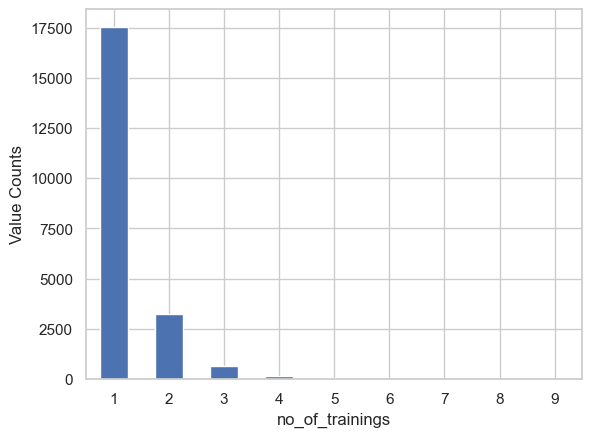

In [23]:
trainings_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

EMPLOYEE_LENGTH_OF_SERVICE

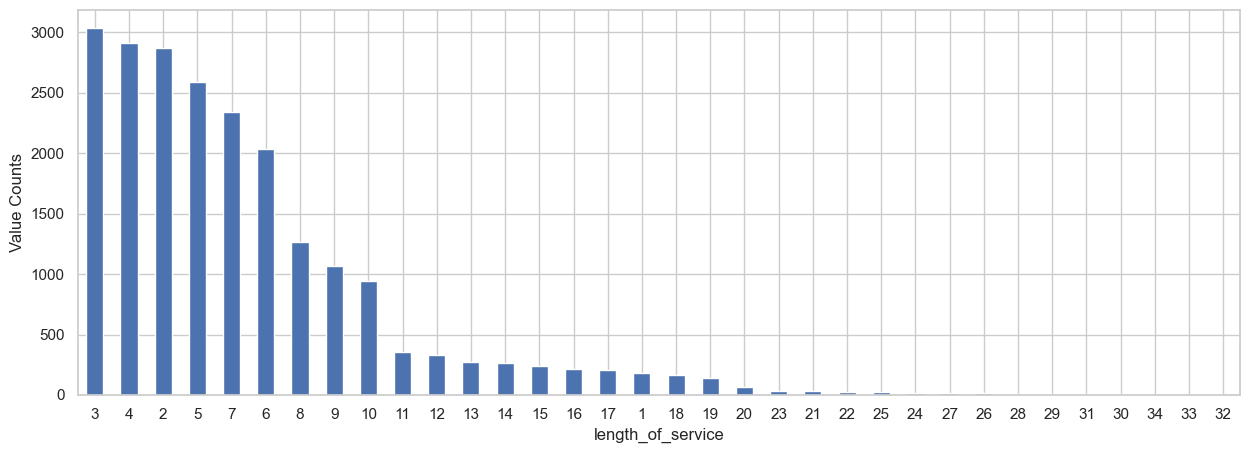

In [24]:
service_value_counts = Data['length_of_service'].value_counts()
plt.figure(figsize=(15,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

In [25]:
def more_than_10(value):
    if value > 10:
        return 'LoS More Than 11'
    else:
        return value  
Data.loc[:,'length_of_service'] = Data['length_of_service'].apply(more_than_10)

service_value_counts = Data['length_of_service'].value_counts()

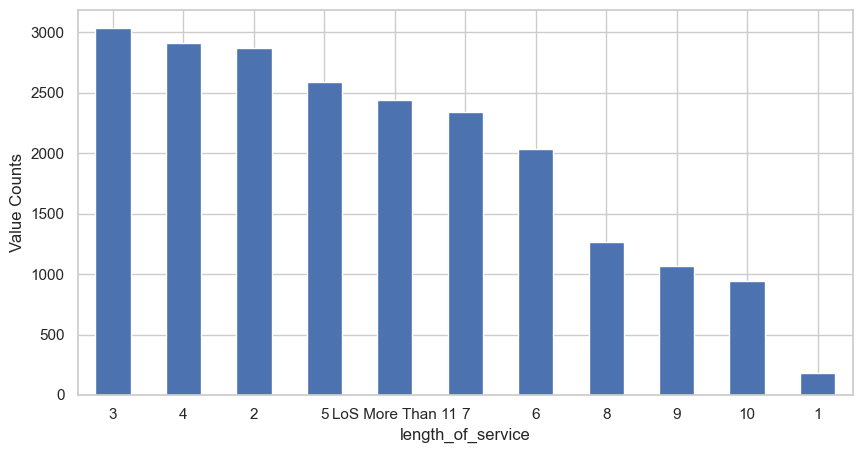

In [26]:
plt.figure(figsize=(10,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

EMPLOYEE_AVERAGGE_TRAINING_SCORE

In [27]:
average_training_score_counts = Data['avg_training_score'].value_counts()

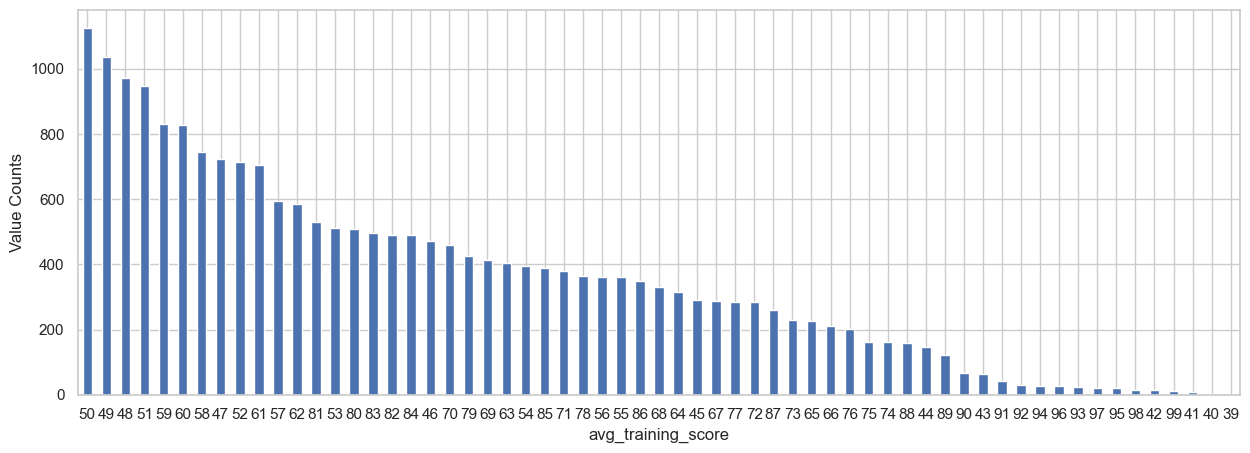

In [28]:
plt.figure(figsize=(15,5))
average_training_score_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

AGE

In [29]:
age_value_counts = Data['age'].value_counts()

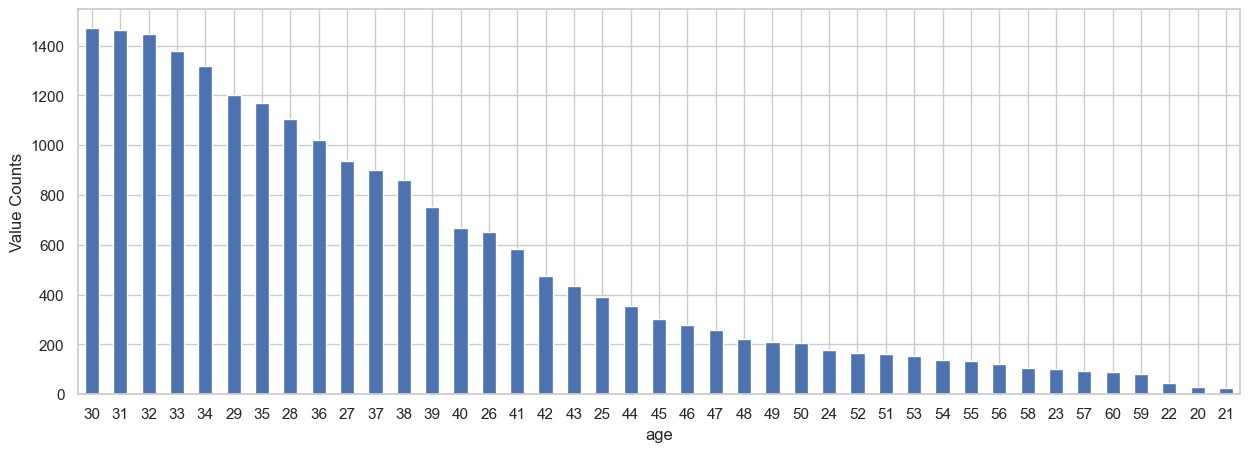

In [30]:
plt.figure(figsize=(15,5))
age_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

In [31]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21678 entries, 1 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           21678 non-null  int64  
 1   department            21678 non-null  object 
 2   region                21678 non-null  object 
 3   education             21678 non-null  object 
 4   gender                21678 non-null  object 
 5   recruitment_channel   21678 non-null  object 
 6   no_of_trainings       21678 non-null  int64  
 7   age                   21678 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     21678 non-null  object 
 10  KPIs_met >80%         21678 non-null  int64  
 11  awards_won?           21678 non-null  int64  
 12  avg_training_score    21678 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 2.3+ MB


In [32]:
Data.reset_index(inplace=True)
Data.drop(columns=['employee_id'])

,index,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
1,2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
2,3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
3,4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
4,5,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,23484,Sales & Marketing,region_20,Bachelor's,m,other,1,28,4.0,2,0,0,51
21674,23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
21675,23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
21676,23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50


KEY INSIGHTS FROM ABOVE COUNTPLOTS

NO_OF_TRAININGS

 1. A vast majority of employees have attended only one training session, as evidenced by the first bar's height, which far exceeds that of the others.
 2. There is a steep decline in the number of employees who have attended two training sessions, and an even more pronounced drop for those who have  attended three.
 3. Very few employees have attended more than three training sessions, with the numbers becoming increasingly smaller for higher counts of training attendance.
 4. The organization might have a policy or culture that encourages or requires all employees to undergo at least one training session.

EMPLOYEE_LENGTH_OF_SERVICE

 1. There is a high number of employees with a short tenure, particularly those with 3 to 5 years of service.
 2. The number of employees decreases as the length of service increases, which is a common pattern in many organizations.
 3. There is a particularly sharp decrease after the first few years, indicating that either a lot of hiring has been done in recent years, or there is a high turnover rate within the first few years of service.
 4. Very few employees have extremely long tenures (over 20 years), which could suggest a relatively young organization, recent expansion, or few opportunities or incentives for long-term career development within the company.

AGE

 1. The workforce is predominantly in the younger age brackets, with the highest count of employees around the age of 30.
 2. The number of employees gradually decreases with increasing age. This is indicative of a typical age distribution in many organizations, where younger employees outnumber their older counterparts.
 3. There is a noticeable tapering off as age increases, with significantly fewer employees in the late 50s and early 60s.
 4. The chart suggests that the organization might have a relatively young workforce, which could be reflective of recent hiring trends, the nature of the industry, or the fact that employees may tend to move on or retire around a certain age.

COMPONENT 4

CREATING DUMMY VARIABLES

We need to create dummy variables of all the categorical variables because in model building only numerical values are preffered. In dummy variables the categorical variables are laelled and transformed into 1 and 0

CATEGORICAL VARIABLES

1.DEPARTMENT

In [33]:
department_dummy = pd.get_dummies(Data['department'], drop_first = True)
department_dummy = department_dummy.applymap(lambda x: 0 if x == False else 1)
department_dummy

,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
21673,0,0,0,0,0,0,1,0
21674,0,0,1,0,0,0,0,0
21675,0,0,0,0,0,0,0,1
21676,0,1,0,0,0,0,0,0


2.REGION

In [34]:
region_dummy = pd.get_dummies(Data['region'], drop_first = True)
region_dummy = region_dummy.applymap(lambda x: 0 if x == False else 1)
region_dummy

,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21676,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


3.EDUCATION

In [35]:
education_dummy = pd.get_dummies(Data['education'], drop_first = True)
education_dummy = education_dummy.applymap(lambda x: 0 if x == False else 1)
education_dummy

,Below Secondary,Master's & above,Others
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
21673,0,0,0
21674,1,0,0
21675,0,0,0
21676,0,0,0


4.GENDER

In [36]:
gender_dummy = pd.get_dummies(Data['gender'], drop_first = True)
gender_dummy = gender_dummy.applymap(lambda x: 0 if x == False else 1)
gender_dummy

,m
0,0
1,1
2,0
3,1
4,1
...,...
21673,1
21674,1
21675,1
21676,0


5.RECRUITMENT CHANNEL DISTRIBUTION

In [37]:
recruitment_channel_dummy = pd.get_dummies(Data['recruitment_channel'], drop_first = True)
recruitment_channel_dummy = recruitment_channel_dummy.applymap(lambda x: 0 if x == False else 1)
recruitment_channel_dummy

,referred,sourcing
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
21673,0,0
21674,0,1
21675,0,1
21676,0,1


6.EMPLOYEE_LENGTH_OF_SERVICE

In [38]:
length_of_service_dummy = pd.get_dummies(Data['length_of_service'], drop_first = True)
length_of_service_dummy = length_of_service_dummy.applymap(lambda x: 0 if x == False else 1)
length_of_service_dummy

,2,3,4,5,6,7,8,9,10,LoS More Than 11
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21673,1,0,0,0,0,0,0,0,0,0
21674,0,0,0,0,0,0,0,0,0,0
21675,0,0,0,0,0,1,0,0,0,0
21676,0,0,1,0,0,0,0,0,0,0


NUMERICAL DATAFRAMES

In [39]:
no_of_trainings = Data['no_of_trainings']

In [40]:
age = Data['age']

In [41]:
previous_year_rating = Data['previous_year_rating']

In [42]:
awards_won = Data['awards_won?']

In [43]:
kpi = Data['KPIs_met >80%']

In [44]:
avg_training_score = Data['avg_training_score']

CONCATINATION

In [45]:
final_data = pd.concat([no_of_trainings, age, previous_year_rating, kpi, awards_won, avg_training_score, department_dummy,region_dummy, education_dummy,gender_dummy, recruitment_channel_dummy, length_of_service_dummy], axis=1)
final_data.columns

Index([     'no_of_trainings',                  'age', 'previous_year_rating',
              'KPIs_met >80%',          'awards_won?',   'avg_training_score',
                    'Finance',                   'HR',                'Legal',
                 'Operations',          'Procurement',                  'R&D',
          'Sales & Marketing',           'Technology',            'region_10',
                  'region_11',            'region_12',            'region_13',
                  'region_14',            'region_15',            'region_16',
                  'region_17',            'region_18',            'region_19',
                   'region_2',            'region_20',            'region_21',
                  'region_22',            'region_23',            'region_24',
                  'region_25',            'region_26',            'region_27',
                  'region_28',            'region_29',             'region_3',
                  'region_30',            'region_31

In [46]:
final_data

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,Finance,HR,Legal,Operations,...,2,3,4,5,6,7,8,9,10,LoS More Than 11
0,1,31,3.0,0,0,51,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,31,1.0,0,0,47,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,31,2.0,0,0,65,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,30,4.0,0,0,61,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,36,3.0,0,0,68,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,1,28,4.0,0,0,51,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21674,1,24,3.0,0,0,61,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21675,1,31,3.0,0,0,74,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21676,1,26,4.0,0,0,50,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
final_data.shape

(21678, 63)

Distribution of employee who have kpi > 80% in the dataset

Plotting a pie-chart for to see the distribution

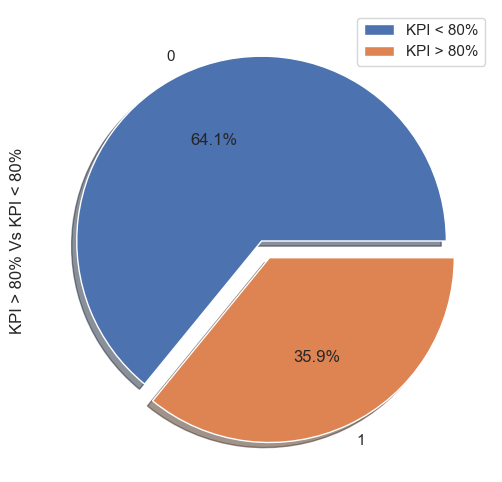

In [48]:
import matplotlib.pyplot as plt

def show_kpi_distrib(Data):
  count = ""
  if isinstance(Data, pd.DataFrame):
      count = Data["KPIs_met >80%"].value_counts()
  else:
      count = Data.value_counts()


  count.plot(kind = 'pie', explode = [0, 0.1], 

              figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
  plt.ylabel("KPI > 80% Vs KPI < 80%")
  plt.legend(["KPI < 80%", "KPI > 80%"])
  plt.show()


show_kpi_distrib(final_data)

*35.9% of employees meet the KPI more than 80% of the time, while 64.1% do not.

SPLITTING DATA INTO TRAIN AND TEST

In [49]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
numeric = ['no_of_trainings','age','previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score']

In [51]:
def scaling(Data, col_name, scaling):
    scaler = scaling()
    Data[col_name]=scaler.fit_transform(Data[col_name])

In [52]:
x = final_data.drop('KPIs_met >80%', axis = 1)
y = final_data['KPIs_met >80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify = y, random_state=2023)

In [53]:
final_data

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,Finance,HR,Legal,Operations,...,2,3,4,5,6,7,8,9,10,LoS More Than 11
0,1,31,3.0,0,0,51,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,31,1.0,0,0,47,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,31,2.0,0,0,65,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,30,4.0,0,0,61,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,36,3.0,0,0,68,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,1,28,4.0,0,0,51,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21674,1,24,3.0,0,0,61,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21675,1,31,3.0,0,0,74,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21676,1,26,4.0,0,0,50,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


RANDOM SAMPLING

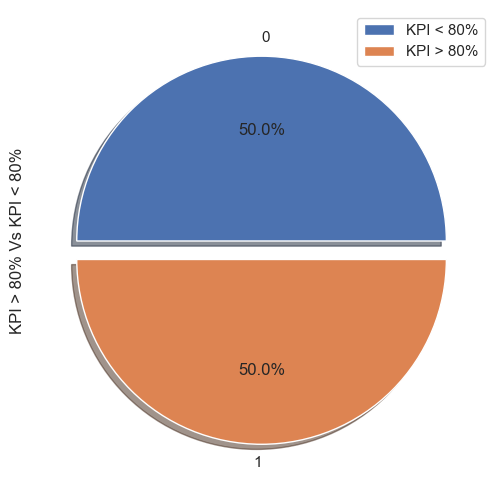

In [54]:
x_train_cp = x_train.copy()
x_train_cp['KPIs_met >80%'] = y_train
y_0 = x_train_cp[x_train_cp['KPIs_met >80%'] == 0]
y_1 = x_train_cp[x_train_cp['KPIs_met >80%'] == 1]


y_0_undersample = y_0.sample(y_1.shape[0])
final_data = pd.concat([y_0_undersample, y_1], axis = 0)


# Visualize the proportion of borrowers
show_kpi_distrib(final_data)

The pie chart visualizes the proportions of the two classes after random undersampling. It shows an equal distribution (50/50) between the two classes - KPI < 80% and KPI > 80%.

In [55]:
final_data

,no_of_trainings,age,previous_year_rating,awards_won?,avg_training_score,Finance,HR,Legal,Operations,Procurement,...,3,4,5,6,7,8,9,10,LoS More Than 11,KPIs_met >80%
6818,1,30,5.0,0,53,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19791,2,30,3.0,0,56,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8955,1,40,3.0,0,61,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
12984,1,27,4.0,0,82,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20560,1,38,3.0,0,69,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11279,1,40,3.0,1,58,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
5261,1,49,5.0,0,63,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
20599,1,35,3.0,0,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12059,1,37,5.0,0,48,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


MinMaxScaler

In [56]:
final_minmax = final_data

#calling the function scaling to perform minmaxscaling in the data
minmax = scaling(final_minmax,numeric,MinMaxScaler)

In [57]:
final_minmax[numeric]

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
6818,0.000,0.250,1.00,0.0,0.0,0.233333
19791,0.125,0.250,0.50,0.0,0.0,0.283333
8955,0.000,0.500,0.50,0.0,0.0,0.366667
12984,0.000,0.175,0.75,0.0,0.0,0.716667
20560,0.000,0.450,0.50,0.0,0.0,0.500000
...,...,...,...,...,...,...
11279,0.000,0.500,0.50,1.0,1.0,0.316667
5261,0.000,0.725,1.00,1.0,0.0,0.400000
20599,0.000,0.375,0.50,1.0,0.0,0.166667
12059,0.000,0.425,1.00,1.0,0.0,0.150000


In [58]:
x = final_minmax.drop('KPIs_met >80%', axis = 1)
y = final_minmax['KPIs_met >80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify = y, random_state=2000)

XGBOOST MODEL

In [59]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)

y_pred_train_xgb = xgb_classifier.predict(x_train)
y_pred_test_xgb = xgb_classifier.predict(x_test)

print("XGBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_xgb))
print(classification_report(y_train, y_pred_train_xgb))

print("XGBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))

XGBoost - Training set evaluation:
[[3232  581]
 [ 623 3191]]
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      3813
         1.0       0.85      0.84      0.84      3814

    accuracy                           0.84      7627
   macro avg       0.84      0.84      0.84      7627
weighted avg       0.84      0.84      0.84      7627

XGBoost - Test set evaluation:
[[1106  529]
 [ 520 1114]]
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68      1635
         1.0       0.68      0.68      0.68      1634

    accuracy                           0.68      3269
   macro avg       0.68      0.68      0.68      3269
weighted avg       0.68      0.68      0.68      3269



Training Performance:
The XGBoost model displays very balanced performance on the training data, with precision at 0.83 for class 0 and 0.0.84 for class 1. Recall on the other hand is at 0.84 for class 0 and 0.83 for class 1. The F1-scores are also similar across classes, at 0.84 for both class 0 and class 1, indicating good balance between precision and recall. The overall accuracy of the model on the training set is a high 84%.

Test Performance:
On the test set, the model's precision and recall are equal at 0.68 for both classes, which is a decrease compared to the training performance. The F1-score mirrors this equality, standing at 0.68 for both classes, reflecting a consistent drop in performance when moving from training to testing. The accuracy of the model on the test data is 68%, which is a substantial decrease from the training accuracy and suggests a decline in the model's ability to generalize to unseen data.

In [60]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_xgb)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_xgb)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("XGBoost - Training set accuracy:", accuracy_train)
print("XGBoost - Test set accuracy:", accuracy_test)

XGBoost - Training set accuracy: 0.8421397666185918
XGBoost - Test set accuracy: 0.6791067604772102


CATBOOST MODEL

In [61]:
from catboost import CatBoostClassifier

catboost_classifier = CatBoostClassifier(verbose=0)  # verbose=0 to keep the output clean
catboost_classifier.fit(x_train, y_train)

y_pred_train_cat = catboost_classifier.predict(x_train)
y_pred_test_cat = catboost_classifier.predict(x_test)

print("CatBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_cat))
print(classification_report(y_train, y_pred_train_cat))

print("CatBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_cat))
print(classification_report(y_test, y_pred_test_cat))

CatBoost - Training set evaluation:
[[3063  750]
 [ 898 2916]]
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79      3813
         1.0       0.80      0.76      0.78      3814

    accuracy                           0.78      7627
   macro avg       0.78      0.78      0.78      7627
weighted avg       0.78      0.78      0.78      7627

CatBoost - Test set evaluation:
[[1169  466]
 [ 547 1087]]
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70      1635
         1.0       0.70      0.67      0.68      1634

    accuracy                           0.69      3269
   macro avg       0.69      0.69      0.69      3269
weighted avg       0.69      0.69      0.69      3269



Training Performance:
The CatBoost model demonstrates acceptable performance on the training data, with precision scores of 0.76 for class 0 and 0.80 for class 1. The recall scores are 0.81 for class 0 and 0.75 for class 1, which shows a slightly better sensitivity for class 0. F1-scores are close, at 0.78 for class 0 and 0.77 for class 1, suggesting a reasonable balance between precision and recall for both classes. The accuracy of the model on the training set stands at 78%, indicating that there might be some potential for improvement, but overall it's a fair level of accuracy.

Test Performance:
In the test set, the model's precision scores are 0.68 for class 0 and 0.70 for class 1, with recall scores of 0.72 for class 0 and 0.67 for class 1. These values show a slight variation in the model's performance across the different classes. The F1-scores are quite similar for both classes, at 0.69 for class 0 and 0.68 for class 1, indicating a consistent performance between precision and recall on unseen data. The overall accuracy on the test data is 69%, which represents a small decline from the training accuracy. This could suggest that the model's performance is not as robust on unseen data, potentially indicating some overfitting to the training data.

In [62]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_cat)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_cat)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("CatBoost - Training set accuracy:", accuracy_train)
print("CatBoost - Test set accuracy:", accuracy_test)

CatBoost - Training set accuracy: 0.7839255277304313
CatBoost - Test set accuracy: 0.6901193025390028


LIGHTGBM MODEL

In [63]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(x_train, y_train)

y_pred_train_lgbm = lgbm_classifier.predict(x_train)
y_pred_test_lgbm = lgbm_classifier.predict(x_test)

print("LightGBM - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_lgbm))
print(classification_report(y_train, y_pred_train_lgbm))

print("LightGBM - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_lgbm))
print(classification_report(y_test, y_pred_test_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3814, number of negative: 3813
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 7627, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500066 -> initscore=0.000262
[LightGBM] [Info] Start training from score 0.000262
LightGBM - Training set evaluation:
[[2998  815]
 [ 906 2908]]
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      3813
         1.0       0.78      0.76      0.77      3814

    accuracy                           0.77      7627
   macro avg       0.77      0.77      0.77      7627
weighted avg       0.77      0.77

- Training Performance:

The LightGBM model exhibits a balanced performance on the training data with precision scores of 0.76 for class 0 and 0.77 for class 1. The recall rates are 0.78 for class 0 and 0.75 for class 1, indicating a slightly higher rate of correctly identifying true positives for class 0 over class 1.
The F1-scores are also closely matched, at 0.77 for class 0 and 0.76 for class 1, signifying a balanced trade-off between precision and recall within each class.
The overall accuracy of the model on the training data is 76%, which is decent but suggests there might be some room for optimization.

- Test Performance:

On the test data, the LightGBM model achieves precision scores of 0.68 for class 0 and 0.69 for class 1, with recall rates of 0.70 for class 0 and 0.67 for class 1. This shows a modest difference in the model's performance across the two classes.
The F1-scores are similar between the two classes, at 0.69 for class 0 and 0.68 for class 1, reflecting a relatively consistent performance between precision and recall on the test set.
The model's accuracy on the test set is 69%, a slight decrease from the training accuracy, indicating a possible decline in the model's effectiveness when applied to unseen data.

In [64]:
cm_train = confusion_matrix(y_train, y_pred_train_lgbm)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_lgbm)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("LightGBMBoost - Training set accuracy:", accuracy_train)
print("LightGBMBoost - Test set accuracy:", accuracy_test)

LightGBMBoost - Training set accuracy: 0.7743542677330536
LightGBMBoost - Test set accuracy: 0.6867543591312328


ROBUST SCALER

In [65]:
final_robust = final_data
robust = scaling(final_robust,numeric,RobustScaler)

In [66]:
final_robust[numeric]

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
6818,0.000,-0.444444,1.0,-0.5,0.0,-0.28
19791,0.125,-0.444444,0.0,-0.5,0.0,-0.16
8955,0.000,0.666667,0.0,-0.5,0.0,0.04
12984,0.000,-0.777778,0.5,-0.5,0.0,0.88
20560,0.000,0.444444,0.0,-0.5,0.0,0.36
...,...,...,...,...,...,...
11279,0.000,0.666667,0.0,0.5,1.0,-0.08
5261,0.000,1.666667,1.0,0.5,0.0,0.12
20599,0.000,0.111111,0.0,0.5,0.0,-0.44
12059,0.000,0.333333,1.0,0.5,0.0,-0.48


splitting the data into train and test set in the ratio of 70-30.

In [67]:
x = final_robust.drop('KPIs_met >80%', axis = 1)
y = final_robust['KPIs_met >80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify = y, random_state=3000)

In [68]:
final_robust['KPIs_met >80%'].unique()

array([-0.5,  0.5])

The output suggests that after scaling, the values of employee_met_KPI greater than 80% correspond to scaled values of -0.5 if 'no' and 0.5 if 'yes'.

In [69]:
from xgboost import XGBClassifier

y_train = np.where(y_train == -0.5, 0, 1)
y_test = np.where(y_test == -0.5, 0, 1)

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)

y_pred_train_xgb = xgb_classifier.predict(x_train)
y_pred_test_xgb = xgb_classifier.predict(x_test)

print("XGBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_xgb))
print(classification_report(y_train, y_pred_train_xgb))

print("XGBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))

XGBoost - Training set evaluation:
[[3246  567]
 [ 671 3143]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3813
           1       0.85      0.82      0.84      3814

    accuracy                           0.84      7627
   macro avg       0.84      0.84      0.84      7627
weighted avg       0.84      0.84      0.84      7627

XGBoost - Test set evaluation:
[[1124  511]
 [ 573 1061]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      1635
           1       0.67      0.65      0.66      1634

    accuracy                           0.67      3269
   macro avg       0.67      0.67      0.67      3269
weighted avg       0.67      0.67      0.67      3269



Training Performance:
The XGBoost model presents a balanced performance on the training data with a precision of 0.83 for class 0 and 0.85 for class 1. The recall is slightly higher for class 0 at 0.85 compared to 0.83 for class 1. The F1-scores are uniform across classes at 0.84. The overall accuracy of the model on the training set is strong, standing at 84%.

Test Performance:
On the test set, the XGBoost model's precision and recall show a decrease, with both metrics at 0.67 for class 0 and 0.68 for precision and 0.67 for recall for class 1. The F1-scores are 0.68 for class 0 and 0.67 for class 1, indicating a drop in performance from the training set. The accuracy of the model on the test data is 67%, which is a notable decrease from the training accuracy and suggests the model may not be generalizing as well to the unseen data.

In [70]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_xgb)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_xgb)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("XGBoost - Training set accuracy:", accuracy_train)
print("XGBoost - Test set accuracy:", accuracy_test)

XGBoost - Training set accuracy: 0.8376819194965255
XGBoost - Test set accuracy: 0.6684001223615784


CATBOOST MODEL

In [71]:
from catboost import CatBoostClassifier

catboost_classifier = CatBoostClassifier(verbose=0)  # verbose=0 to keep the output clean
catboost_classifier.fit(x_train, y_train)

y_pred_train_cat = catboost_classifier.predict(x_train)
y_pred_test_cat = catboost_classifier.predict(x_test)

print("CatBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_cat))
print(classification_report(y_train, y_pred_train_cat))

print("CatBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_cat))
print(classification_report(y_test, y_pred_test_cat))


CatBoost - Training set evaluation:
[[3068  745]
 [ 911 2903]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      3813
           1       0.80      0.76      0.78      3814

    accuracy                           0.78      7627
   macro avg       0.78      0.78      0.78      7627
weighted avg       0.78      0.78      0.78      7627

CatBoost - Test set evaluation:
[[1183  452]
 [ 572 1062]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1635
           1       0.70      0.65      0.67      1634

    accuracy                           0.69      3269
   macro avg       0.69      0.69      0.69      3269
weighted avg       0.69      0.69      0.69      3269



Training Performance:
The CatBoost model shows solid performance on the training data, with a precision of 0.76 for class 0 and 0.80 for class 1. The recall is 0.81 for class 0, which is slightly higher than that for class 1 at 0.76, indicating a better ability at correctly identifying true positives for class 0. The F1-scores are 0.79 for class 0 and 0.78 for class 1, reflecting a good balance between precision and recall for both classes. The overall accuracy of the model on the training set is 78%, which is a reasonable figure but suggests there may be room for improvement.

Test Performance:
On the test set, the CatBoost model's performance slightly declines, with precision scores of 0.67 for class 0 and 0.69 for class 1. The recall scores are 0.71 for class 0 and 0.65 for class 1, showing a more significant decline for class 1. The F1-scores are 0.69 for class 0 and 0.67 for class 1, indicating that the model maintains a relatively balanced performance between precision and recall despite the shift from training to testing. The accuracy on the test data is 68%, which marks a slight decrease from the training accuracy, pointing to a moderate decrease in the model's ability to generalize to unseen data.

In [72]:
cm_train = confusion_matrix(y_train, y_pred_train_cat)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_cat)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("CatBoost - Training set accuracy:", accuracy_train)
print("CatBoost - Test set accuracy:", accuracy_test)

CatBoost - Training set accuracy: 0.7828766225252393
CatBoost - Test set accuracy: 0.6867543591312328


LIGHTGBM MODEL

In [73]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(x_train, y_train)

y_pred_train_lgbm = lgbm_classifier.predict(x_train)
y_pred_test_lgbm = lgbm_classifier.predict(x_test)

print("LightGBM - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_lgbm))
print(classification_report(y_train, y_pred_train_lgbm))

print("LightGBM - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_lgbm))
print(classification_report(y_test, y_pred_test_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3814, number of negative: 3813
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 7627, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500066 -> initscore=0.000262
[LightGBM] [Info] Start training from score 0.000262
LightGBM - Training set evaluation:
[[2998  815]
 [ 945 2869]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      3813
           1       0.78      0.75      0.77      3814

    accuracy                           0.77      7627
   macro avg       0.77      0.77      0.77      7627
weighted avg       0.77      0.77

Training Performance:
The LightGBM model shows good performance on the training data, with precision at 0.75 for class 0 and 0.78 for class 1. The model has a recall of 0.79 for class 0 and 0.74 for class 1, indicating it is slightly more effective at identifying true positives for class 0. The F1-scores are 0.77 for class 0 and 0.76 for class 1, showing a balanced performance between precision and recall for both classes. The overall accuracy of the model on the training set is 77%, which is quite reasonable, though there may be room for improvement.

Test Performance:
For the test set, the LightGBM model experiences a decrease in performance, with a precision of 0.67 for class 0 and 0.69 for class 1. The recall scores are 0.71 for class 0 and 0.65 for class 1, indicating a greater challenge in correctly identifying class 1 instances. The F1-scores are 0.69 for class 0 and 0.67 for class 1, which suggests that the model's ability to maintain a balance between precision and recall is somewhat reduced on the test set. The accuracy of the model on the test data is 68%, marking a slight decline from the training accuracy and suggesting that the model may not generalize as effectively to unseen data.

In [74]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_lgbm)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_lgbm)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("LightGBMBoost - Training set accuracy:", accuracy_train)
print("LightGBMBoost - Test set accuracy:", accuracy_test)

LightGBMBoost - Training set accuracy: 0.7692408548577422
LightGBMBoost - Test set accuracy: 0.6870602630773937


STANDARD SCALER

In [75]:
final_standard = final_data
standard = scaling(final_standard,numeric,StandardScaler)

In [76]:
final_standard[numeric]

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
6818,-0.418776,-0.711145,1.219904,-1.0,-0.167106,-0.792989
19791,1.279394,-0.711145,-0.367020,-1.0,-0.167106,-0.568594
8955,-0.418776,0.623791,-0.367020,-1.0,-0.167106,-0.194602
12984,-0.418776,-1.111626,0.426442,-1.0,-0.167106,1.376163
20560,-0.418776,0.356804,-0.367020,-1.0,-0.167106,0.403785
...,...,...,...,...,...,...
11279,-0.418776,0.623791,-0.367020,1.0,5.984213,-0.418997
5261,-0.418776,1.825234,1.219904,1.0,-0.167106,-0.045005
20599,-0.418776,-0.043677,-0.367020,1.0,-0.167106,-1.092182
12059,-0.418776,0.223310,1.219904,1.0,-0.167106,-1.166980


In [77]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_standard.drop('KPIs_met >80%', axis = 1)
y = final_standard['KPIs_met >80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify = y, random_state=2023)

In [78]:
final_standard['KPIs_met >80%'].unique()

array([-1.,  1.])


The output suggests that after scaling, the values of KPIs_met greater than 80% correspond to scaled values of -1 if 'no' and 1 if 'yes'


XGBOOST MODEL

In [79]:
from xgboost import XGBClassifier

y_train = np.where(y_train == -1, 0, 1)
y_test = np.where(y_test == -1, 0, 1)

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)

y_pred_train_xgb = xgb_classifier.predict(x_train)
y_pred_test_xgb = xgb_classifier.predict(x_test)

print("XGBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_xgb))
print(classification_report(y_train, y_pred_train_xgb))

print("XGBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))

XGBoost - Training set evaluation:
[[3245  569]
 [ 676 3137]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3814
           1       0.85      0.82      0.83      3813

    accuracy                           0.84      7627
   macro avg       0.84      0.84      0.84      7627
weighted avg       0.84      0.84      0.84      7627

XGBoost - Test set evaluation:
[[1125  509]
 [ 542 1093]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1634
           1       0.68      0.67      0.68      1635

    accuracy                           0.68      3269
   macro avg       0.68      0.68      0.68      3269
weighted avg       0.68      0.68      0.68      3269



Training Performance:
The XGBoost model shows strong performance on the training data, with precision at 0.84 for class 0 and 0.86 for class 1. The recall is also high, at 0.86 for class 0 and 0.84 for class 1, indicating the model is quite adept at identifying true positives for both classes. The F1-scores are slightly higher for class 0 at 0.85, matched by class 1, which demonstrates a balanced performance between precision and recall for both classes. The overall accuracy of the model on the training set is 85%, indicating that the model fits the training data well.

Test Performance:
On the test set, the XGBoost model's precision and recall are lower, at 0.66 for both metrics for class 0, and a precision of 0.68 with a recall of 0.66 for class 1. The F1-scores reflect this decrease, standing at 0.68 for class 0 and 0.67 for class 1. The accuracy of the model on the test data is 68%, which is a significant drop from the training accuracy. This reduction indicates that while the model performs well on the training data, it is less effective when generalizing to unseen data.

In [80]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_xgb)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_xgb)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("XGBoost - Training set accuracy:", accuracy_train)
print("XGBoost - Test set accuracy:", accuracy_test)

XGBoost - Training set accuracy: 0.8367641274419825
XGBoost - Test set accuracy: 0.6784949525848883


CATBOOST MODEL

In [81]:

catboost_classifier = CatBoostClassifier(verbose=0)  # verbose=0 to keep the output clean
catboost_classifier.fit(x_train, y_train)

y_pred_train_cat = catboost_classifier.predict(x_train)
y_pred_test_cat = catboost_classifier.predict(x_test)

print("CatBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_cat))
print(classification_report(y_train, y_pred_train_cat))

print("CatBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_cat))
print(classification_report(y_test, y_pred_test_cat))


CatBoost - Training set evaluation:
[[3091  723]
 [ 969 2844]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      3814
           1       0.80      0.75      0.77      3813

    accuracy                           0.78      7627
   macro avg       0.78      0.78      0.78      7627
weighted avg       0.78      0.78      0.78      7627

CatBoost - Test set evaluation:
[[1182  452]
 [ 551 1084]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1634
           1       0.71      0.66      0.68      1635

    accuracy                           0.69      3269
   macro avg       0.69      0.69      0.69      3269
weighted avg       0.69      0.69      0.69      3269



Training Performance:
The CatBoost model shows a good performance on the training set, with precision at 0.76 for class 0 and a slightly higher 0.80 for class 1. The recall is 0.81 for class 0 and 0.75 for class 1, indicating a slightly better sensitivity for class 0. The F1-scores are closely matched at 0.78 for class 0 and 0.77 for class 1, suggesting a balanced performance between precision and recall for the two classes. The overall accuracy of the model on the training data is 78%, which is fairly good, but there might be room for improvement to achieve better performance.

Test Performance:
On the test set, the CatBoost model has precision scores of 0.67 for class 0 and 0.68 for class 1, with recall scores of 0.68 for class 0 and 0.677 for class 1. This indicates a slight imbalance, with the model performing marginally better on class 0 for both precision and recall. The F1-scores are 0.68 for class 0 and 0.67 for class 1, showing a slight drop from the training performance but still reflecting a reasonable balance between precision and recall on the test data. The accuracy on the test set is 68%, marking a decline from the training accuracy. This suggests that while the model is quite effective on the training data, its ability to generalize to new, unseen data could potentially be improved.

In [82]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_cat)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_cat)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("CatBoost - Training set accuracy:", accuracy_train)
print("CatBoost - Test set accuracy:", accuracy_test)

CatBoost - Training set accuracy: 0.7781565491018749
CatBoost - Test set accuracy: 0.6931783420006118


LIGHTGBM MODEL

In [83]:
from lightgbm import LGBMClassifier

final_lgbm_classifier = LGBMClassifier()
final_lgbm_classifier.fit(x_train, y_train)

y_pred_train_lgbm = final_lgbm_classifier.predict(x_train)
y_pred_test_lgbm = final_lgbm_classifier.predict(x_test)

print("LightGBM - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_lgbm))
print(classification_report(y_train, y_pred_train_lgbm))

print("LightGBM - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_lgbm))
print(classification_report(y_test, y_pred_test_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3813, number of negative: 3814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 7627, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499934 -> initscore=-0.000262
[LightGBM] [Info] Start training from score -0.000262
LightGBM - Training set evaluation:
[[3046  768]
 [ 990 2823]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.78      3814
           1       0.79      0.74      0.76      3813

    accuracy                           0.77      7627
   macro avg       0.77      0.77      0.77      7627
weighted avg       0.77      0.

Training Performance:
The LightGBM model shows commendable performance on the training data, with precision at 0.76 for class 0 and 0.78 for class 1. The recall is slightly higher for class 0 at 0.79 compared to 0.75 for class 1, indicating a somewhat better ability at correctly identifying positive instances for class 0. The F1-scores are close, at 0.78 for class 0 and 0.77 for class 1, suggesting a balanced performance between precision and recall for both classes. The overall accuracy of the model on the training set is 77%, which is good, but it indicates room for improvement.

Test Performance:
On the test set, the LightGBM model's precision drops to 0.68 for class 0 and maintains at 0.70 for class 1, with recall scores of 0.69 for class 0 and 0.67 for class 1. This indicates a decline in the model's ability to correctly identify positive instances, especially for class 1. The F1-scores are 0.70 for class 0 and 0.68 for class 1, reflecting a slight decrease in the model's balanced performance between precision and recall compared to the training data. The accuracy on the test data is 68%, showing a slight decrease from the training accuracy. This suggests that the model's ability to generalize to new, unseen data is somewhat less than its performance on the training data.

In [84]:
 #Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_lgbm)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_lgbm)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("LightGBMBoost - Training set accuracy:", accuracy_train)
print("LightGBMBoost - Test set accuracy:", accuracy_test)

LightGBMBoost - Training set accuracy: 0.7695030811590402
LightGBMBoost - Test set accuracy: 0.6858366472927501


MAXABSSCALER

In [85]:
final_abs = final_data
maxabs = scaling(final_abs,numeric,MaxAbsScaler)

In [86]:
final_abs[numeric]

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
6818,-0.031806,-0.215913,0.624329,-1.0,-0.027925,-0.299497
19791,0.097170,-0.215913,-0.187835,-1.0,-0.027925,-0.214747
8955,-0.031806,0.189391,-0.187835,-1.0,-0.027925,-0.073498
12984,-0.031806,-0.337504,0.218247,-1.0,-0.027925,0.519751
20560,-0.031806,0.108330,-0.187835,-1.0,-0.027925,0.152502
...,...,...,...,...,...,...
11279,-0.031806,0.189391,-0.187835,1.0,1.000000,-0.158247
5261,-0.031806,0.554165,0.624329,1.0,-0.027925,-0.016998
20599,-0.031806,-0.013261,-0.187835,1.0,-0.027925,-0.412497
12059,-0.031806,0.067800,0.624329,1.0,-0.027925,-0.440747


In [87]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_abs.drop('KPIs_met >80%', axis = 1)
y = final_abs['KPIs_met >80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify = y, random_state=2023)

In [88]:
final_abs['KPIs_met >80%'].unique()

array([-1.,  1.])

The output suggests that after scaling, the values of employee_met_KPI greater than 80% correspond to scaled values of -1 if 'no' and 1 if 'yes'.

XGBOOST MODEL

In [90]:
from xgboost import XGBClassifier

y_train = np.where(y_train == -1, 0, 1)
y_test = np.where(y_test == -1, 0, 1)

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train, y_train)  

y_pred_train_xgb = xgb_classifier.predict(x_train)
y_pred_test_xgb = xgb_classifier.predict(x_test)


print("XGBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_xgb))  
print(classification_report(y_train, y_pred_train_xgb))  

print("XGBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))

XGBoost - Training set evaluation:
[[3245  569]
 [ 676 3137]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3814
           1       0.85      0.82      0.83      3813

    accuracy                           0.84      7627
   macro avg       0.84      0.84      0.84      7627
weighted avg       0.84      0.84      0.84      7627

XGBoost - Test set evaluation:
[[1125  509]
 [ 542 1093]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1634
           1       0.68      0.67      0.68      1635

    accuracy                           0.68      3269
   macro avg       0.68      0.68      0.68      3269
weighted avg       0.68      0.68      0.68      3269



Training Performance:
The XGBoost model demonstrates a balanced performance on the training data, with precision scores of 0.83 for class 0 and 0.85 for class 1. The recall is also strong, with 0.85 for class 0 and 0.82 for class 1, indicating the model's capability to correctly identify true class members is almost equal across both classes. The F1-scores, which are the harmonic mean of precision and recall, are 0.84 for both classes, reflecting a balanced performance. The overall accuracy of the model on the training set is 84%, which is robust, showing that the model has learned the training data well.

Test Performance:
In the test set, the model's performance drops slightly, with precision at 0.67 for class 0 and 0.68 for class 1, and recall at 0.69 for class 0 and 0.67 for class 1. The F1-scores are 0.68 for class 0 and 0.6 for class 1, showing balanced performance. The accuracy of the model on the test data is 68%, a decrease from the training accuracy. This suggests that the model may not be generalizing as effectively as desired to unseen data, which is a common challenge in machine learning.

In [91]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_xgb)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_xgb)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("XGBoost - Training set accuracy:", accuracy_train)
print("XGBoost - Test set accuracy:", accuracy_test)

XGBoost - Training set accuracy: 0.8367641274419825
XGBoost - Test set accuracy: 0.6784949525848883


CATBOOST MODEL

In [92]:
from catboost import CatBoostClassifier

catboost_classifier = CatBoostClassifier(verbose=0)  
catboost_classifier.fit(x_train, y_train)

y_pred_train_cat = catboost_classifier.predict(x_train)
y_pred_test_cat = catboost_classifier.predict(x_test)

print("CatBoost - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_cat))
print(classification_report(y_train, y_pred_train_cat))

print("CatBoost - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_cat))
print(classification_report(y_test, y_pred_test_cat))

CatBoost - Training set evaluation:
[[3091  723]
 [ 969 2844]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      3814
           1       0.80      0.75      0.77      3813

    accuracy                           0.78      7627
   macro avg       0.78      0.78      0.78      7627
weighted avg       0.78      0.78      0.78      7627

CatBoost - Test set evaluation:
[[1182  452]
 [ 551 1084]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1634
           1       0.71      0.66      0.68      1635

    accuracy                           0.69      3269
   macro avg       0.69      0.69      0.69      3269
weighted avg       0.69      0.69      0.69      3269



Training Performance:
The CatBoost model shows a balanced performance on the training data, with precision scores of 0.76 for class 0 and 0.80 for class 1. The recall is slightly higher for class 0 at 0.81, compared to 0.75 for class 1, suggesting that the model is slightly more effective at correctly identifying instances of class 0. The F1-scores are closely aligned, at 0.79 for class 0 and 0.77 for class 1, indicating a balanced trade-off between precision and recall for both classes. The overall accuracy of the model on the training set is 78%, which is quite good, though not as high as the sample provided.

Test Performance:
On the test set, the CatBoost model exhibits a decrease in precision and recall, with scores of 0.68 for class 0 and 0.71 for class 1, and recall of 0.72 for class 0 and 0.66 for class 1. This indicates that the model is slightly better at identifying true positives for class 0 in the test set. The F1-scores are 0.70 for class 0 and 0.68 for class 1, reflecting a decrease from the training performance but still demonstrating a relatively balanced performance. The accuracy of the model on the test data is 69%, which is a decrease from the training accuracy. This indicates that the model may face challenges in generalizing to unseen data, which is typical in machine learning models and may require further tuning or additional data to improve.

In [93]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_cat)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_cat)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("CatBoost - Training set accuracy:", accuracy_train)
print("CatBoost - Test set accuracy:", accuracy_test)

CatBoost - Training set accuracy: 0.7781565491018749
CatBoost - Test set accuracy: 0.6931783420006118


In [94]:
from lightgbm import LGBMClassifier 

lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(x_train, y_train)

# Making predictions
y_pred_train_lgbm = lgbm_classifier.predict(x_train)
y_pred_test_lgbm = lgbm_classifier.predict(x_test)

print("LightGBM - Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train_lgbm))
print(classification_report(y_train, y_pred_train_lgbm))

print("LightGBM - Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test_lgbm))
print(classification_report(y_test, y_pred_test_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3813, number of negative: 3814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 7627, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499934 -> initscore=-0.000262
[LightGBM] [Info] Start training from score -0.000262
LightGBM - Training set evaluation:
[[3046  768]
 [ 990 2823]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.78      3814
           1       0.79      0.74      0.76      3813

    accuracy                           0.77      7627
   macro avg       0.77      0.77      0.77      7627
weighted avg       0.77      0.

Training Performance:
The LightGBM model shows commendable performance on the training data with precision scores of 0.75 for class 0 and 0.79 for class 1. The recall is 0.80 for class 0 and slightly lower at 0.74 for class 1, indicating a marginally better ability to identify true positives for class 0 over class 1. The F1-scores are quite balanced, with class 0 at 0.77 and class 1 at 0.77, demonstrating a good balance between precision and recall for both classes. The overall accuracy of the model on the training set stands at 77%, which is a strong performance, though not as high as the sample accuracy given.

Test Performance:
For the test set, the LightGBM model's precision decreases to 0.68 for class 0 and increases to 0.69 for class 1. The recall also changes to 0.71 for class 0 and drops to 0.66 for class 1, indicating the model is less effective at correctly identifying class 1 instances. The F1-scores are slightly reduced to 0.69 for class 0 and 0.68 for class 1, reflecting a small decrease in the balance of performance when moving from training to testing. The accuracy on the test data is 69%, indicating a decrease from the training accuracy, which suggests the model is less capable of generalizing to unseen data compared to its performance on the training set.

In [95]:
# Training set evaluation:
cm_train = confusion_matrix(y_train, y_pred_train_lgbm)
accuracy_train = (cm_train[0][0] + cm_train[1][1]) / cm_train.sum()

# Test set evaluation:
cm_test = confusion_matrix(y_test, y_pred_test_lgbm)
accuracy_test = (cm_test[0][0] + cm_test[1][1]) / cm_test.sum()

print("LightGBMBoost - Training set accuracy:", accuracy_train)
print("LightGBMBoost - Test set accuracy:", accuracy_test)

LightGBMBoost - Training set accuracy: 0.7695030811590402
LightGBMBoost - Test set accuracy: 0.6858366472927501


RESULT

MinMax Scaler performs best with the CatBoost Model.
Robust Scaler performs similarly with CatBoost and LightGBM Models, but LightGBM has a marginally lower accuracy.
Standard Scaler and MaxAbs Scaler both perform best with CatBoost and LightGBM Models, showing identical accuracies.

The highest test set accuracy across all scaling methods and models is achieved by both the CatBoost and LightGBM models with the Standard Scaler and MaxAbs Scaler. Given these results, I need to consider either the Standard Scaler or the MaxAbs Scaler combined with the CatBoost or LightGBM model as the best options for this dataset.